# Task 1 : Supervised-Learning

## Author: Prathamesh Shirole

## GRIP Internship - Data Science & Business Analytics

This task involves analysing two variables by applying a simple linear regression module, using Python's Scikit-Learn library
for machine learning.

## Simple linear regression:

Linear regression is a mathematical method to plot a scalar relationship between one or more variables. This involves usually
a single independant that when given input to a function provides an output. For practical data, we can essentially understand to what degree a particular independant variable affects the outcome.

In this case we not only find the correlation but also predict how well does the student perform in his or her exam given the
number of hours he or she studies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_data = pd.read_csv('datasets/hours_scores.csv')

Let's check for Nan values and convert the values of the columns to float.

So, there are no Nan values, this saves us from cleaning the simple two variable dataset.

Let's take a look at the general relationship of the two variables with each other by a simple scatter plot.

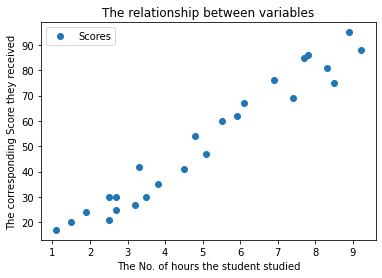

In [3]:
student_data.plot(x='Hours', y='Scores',style='o')
plt.title('The relationship between variables')
plt.xlabel('The No. of hours the student studied')
plt.ylabel('The corresponding Score they received')
plt.show()

**From the plot it is quite evident that there is linear correlation between hours studied and scores**

Let us also see the correlation

In [4]:
import scipy.stats as stats

In [5]:
hours_studied = pd.to_numeric(student_data['Hours'], errors = 'coerce')
scores_received = pd.to_numeric(student_data['Scores'], errors='coerce')

In [6]:
stats.pearsonr(hours_studied,scores_received)[0]

0.9761906560220884

In [7]:
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Splits:

Let us now understand that our input will be the hours studied and the output will be the score they would have received

In [8]:
X = student_data.iloc[:,0].values.reshape(-1,1)  # hours studied
Y = student_data.iloc[:,1]    # score received

In [9]:
from sklearn.model_selection import train_test_split  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

Supervised learning involves giving an input-output pair example to the machine, which then understands this relation
this is called **training** the dataset.

We import the **linear regression module** for the estabilished linear correlation between scores and hours studied

In [10]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, Y_train) 

print("System is trained")

System is trained


In [12]:
import seaborn as sns

Text(0.5, 0, 'hours')

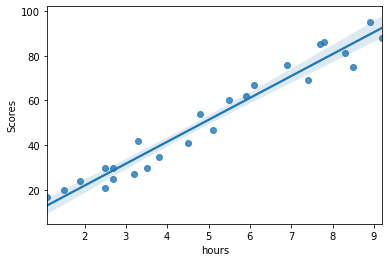

In [14]:
sns.regplot(x=X,y=Y)
plt.xlabel("hours")

**Now that we have completed training our datasets, it's time to make predictions!**

In [15]:
Scores_predict = lr.predict(X_test)

In [16]:
Scores_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': Scores_predict})

In [18]:
predictions

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


So we see that the predicted value is slightly skewed yet a decent accuracy is acheived. To compare these two properly let's compare these two by a density plot.

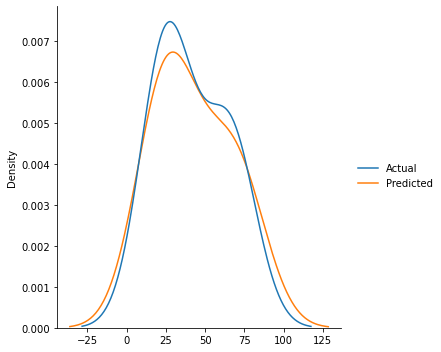

In [19]:
sns.displot(predictions, kind="kde")

We can now predict scores on the amount of hours studied by a student.

In [21]:
Hours= input("Enter the no of hours you have studied: ")
hour= float(Hours)
ar= [[hour]]
user_pred= lr.predict(ar)
score= user_pred[0]
print("You will score around ",score)

Enter the no of hours you have studied: 7
You will score around  71.39275540593033


Obviously the predictions are not identical but the error in these prediction models can be calculated by using multiple methods. One such method is the **mean square root error**.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Scores_predict))

Mean Absolute Error: 4.18385989900298
